# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data from csv file

bank_df = pd.read_csv('bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#Shape of dataset

bank_df.shape

(11162, 17)

In [4]:
# Getting basic information

bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
# Getting Five number summery of Numerical columns

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
# Checking for null values

bank_df.isnull().sum()   #There is no null values in the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
# Checking unique values in each column

bank_df.nunique().sort_values(ascending=False)

balance      3805
duration     1428
pdays         472
age            76
campaign       36
previous       34
day            31
job            12
month          12
poutcome        4
education       4
contact         3
marital         3
loan            2
housing         2
default         2
deposit         2
dtype: int64

In [8]:
bank = bank_df

# Separating Categorical columns and Numerical columns

In [9]:
#Getting all columns

bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
# Getting Categorical columns

categorical_col = bank.select_dtypes(include=['object']).columns.tolist()
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [11]:
# Getting Numerical columns

numerical_col = bank.select_dtypes(include=['int64']).columns.tolist()
numerical_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Countplot for categorical columns

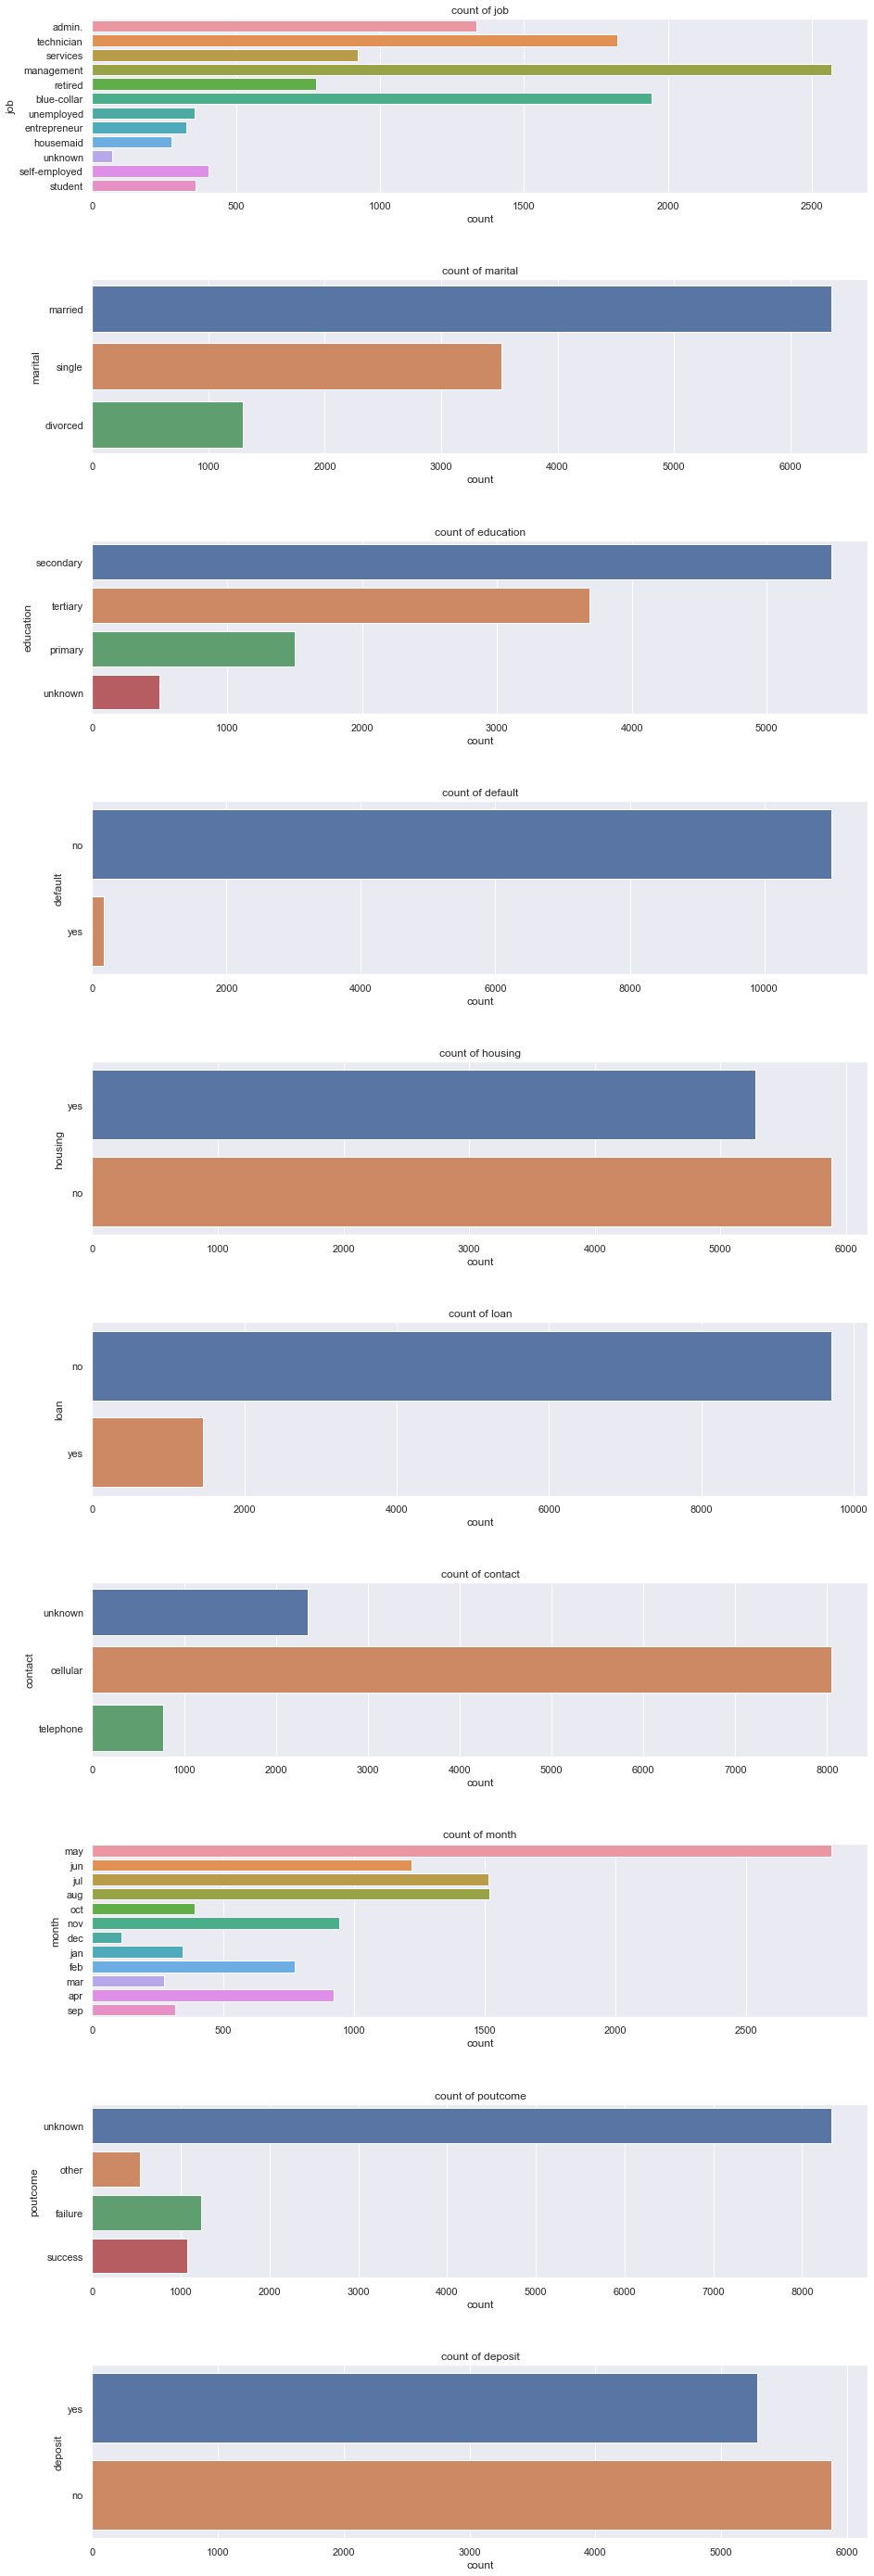

In [12]:
sns.set_theme()
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(15, 50))
fig.subplots_adjust(hspace=.5)
plt.title('Countplot for categorical variables')

for i, col in enumerate(categorical_col):
    sns.countplot(y=col, data=bank, ax=ax[i])
    ax[i].set_title('count of {}'.format(col))

# Data Preprocessing For Categorical Columns

In [13]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [14]:
bank = preprocessor(bank)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


# Cheking for the Zero Variance

In [15]:
selector = VarianceThreshold(threshold=0)
selector.fit(bank)

VarianceThreshold(threshold=0)

In [16]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [17]:
bank.columns[selector.get_support()]

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [18]:
# Get features which have the variance less than the set threshold values using list comprehension

selected_cols = [column for column in bank.columns if column not in bank.columns[selector.get_support()]]

In [19]:
selected_cols  #There is no zero variance columns 

[]

# Correlation Check

<AxesSubplot:>

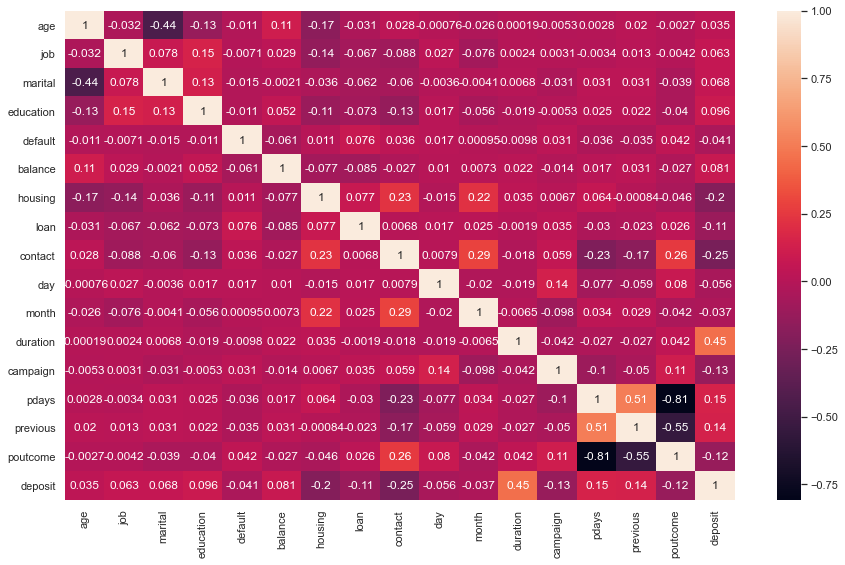

In [20]:
# Checking correlation between numerical variables

correlations = bank.corr()
plt.subplots(figsize=(15,9))
sns.heatmap(correlations, annot=True)

In [21]:
def correlation(dataset, threshold):
    col_corr = list() # list of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
    return col_corr

In [22]:
corr_feature = correlation(bank, 0.75)
len(set(corr_feature))

0

In [23]:
corr_feature  #There is no correlated variables in dataset

[]

# Distribution of numerical attributes

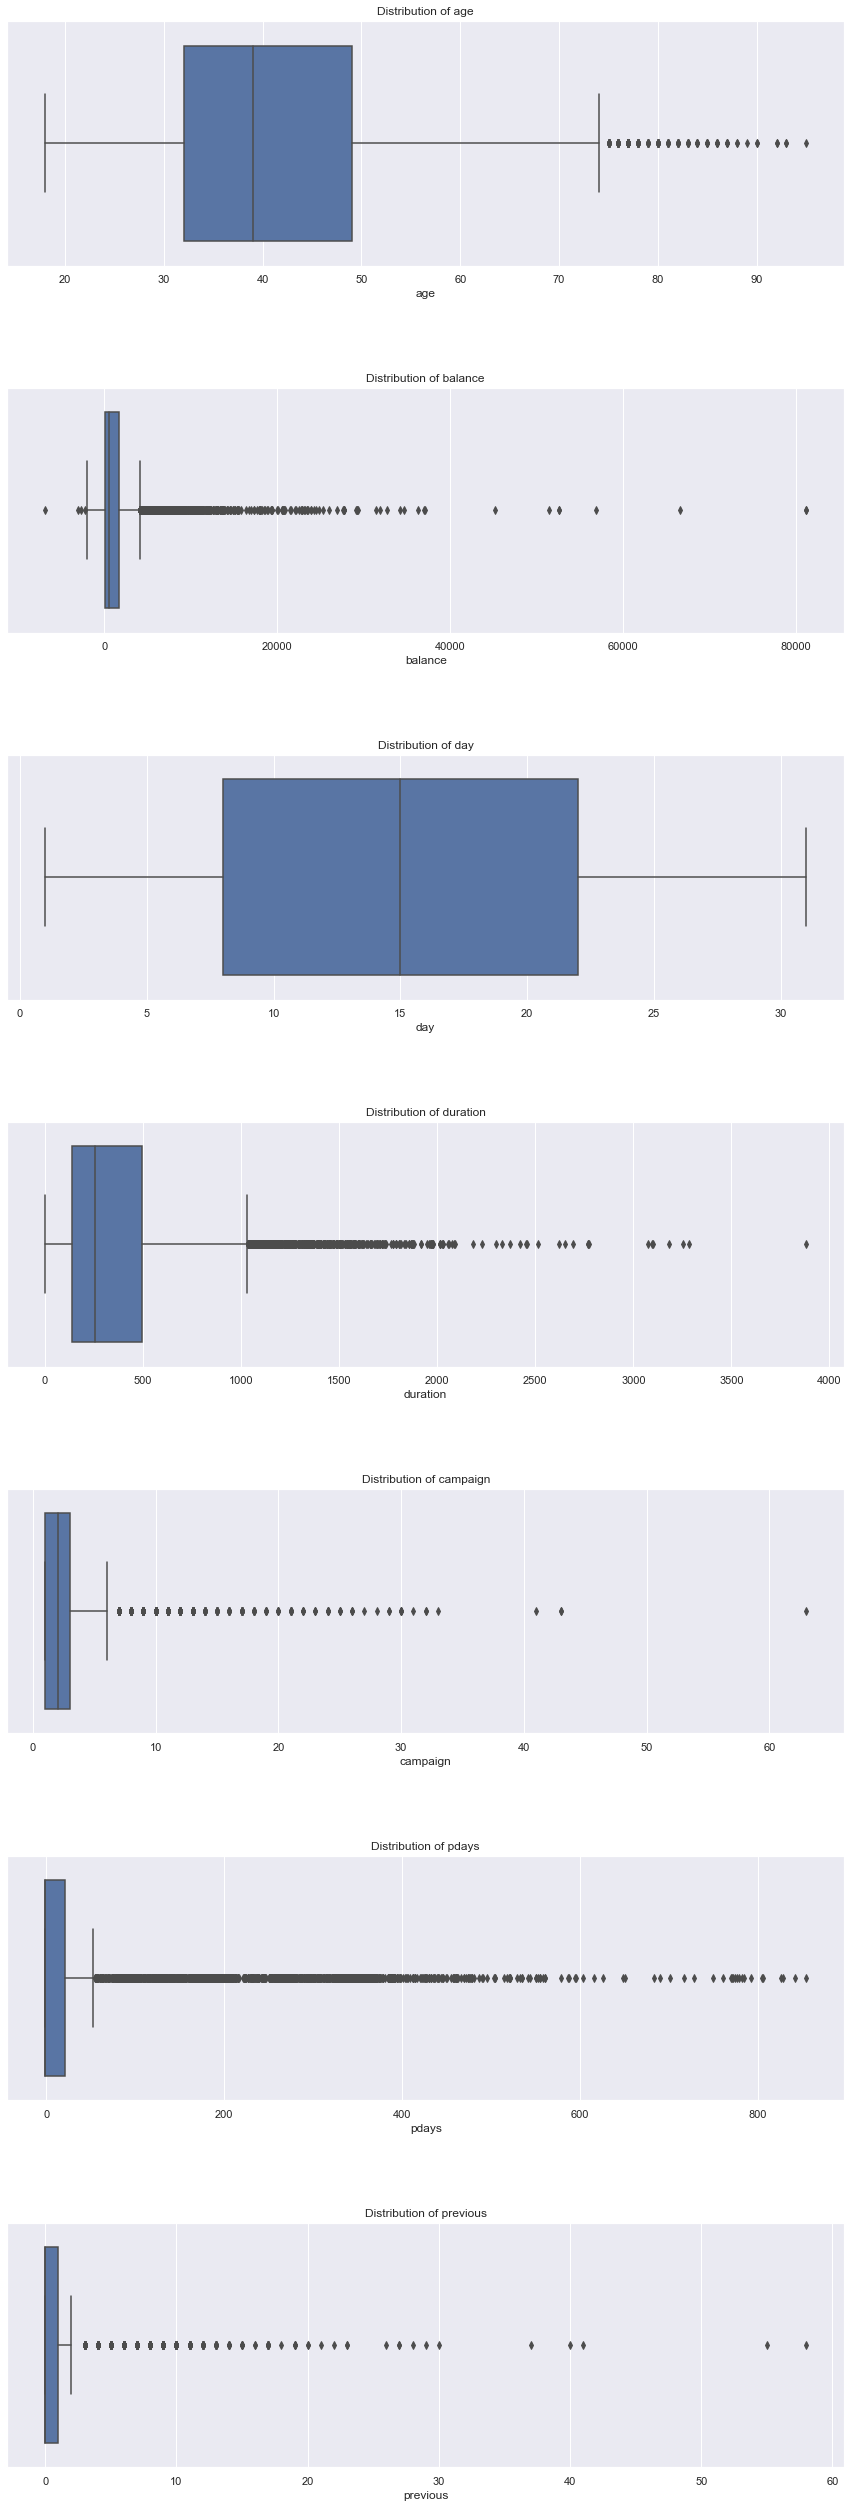

In [24]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(15, 45)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(numerical_col):
    sns.boxplot(x=bank[col], ax=ax[i])
    ax[i].set_title('Distribution of {}'.format(col))

# Handling Outliers by Capping and Flooring

In [25]:
# define a function called 'iqr_outliers_cap_floor'
# IQR = Q3 - Q1
# +/- 1.5 * IQR

def iqr_outliers_cap_floor(df, cols, factor):
    for ft in cols:
        Q1 = df[ft].quantile(0.25)
        Q3 = df[ft].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        df[ft] = np.where(df[ft] > upper_limit, upper_limit, np.where(df[ft] < lower_limit, lower_limit, df[ft]))

In [26]:
# Calling function 'iqr_outliers_cap_floor'

iqr_outliers_cap_floor(bank, numerical_col, 1.5)

In [27]:
bank.shape

(11162, 17)

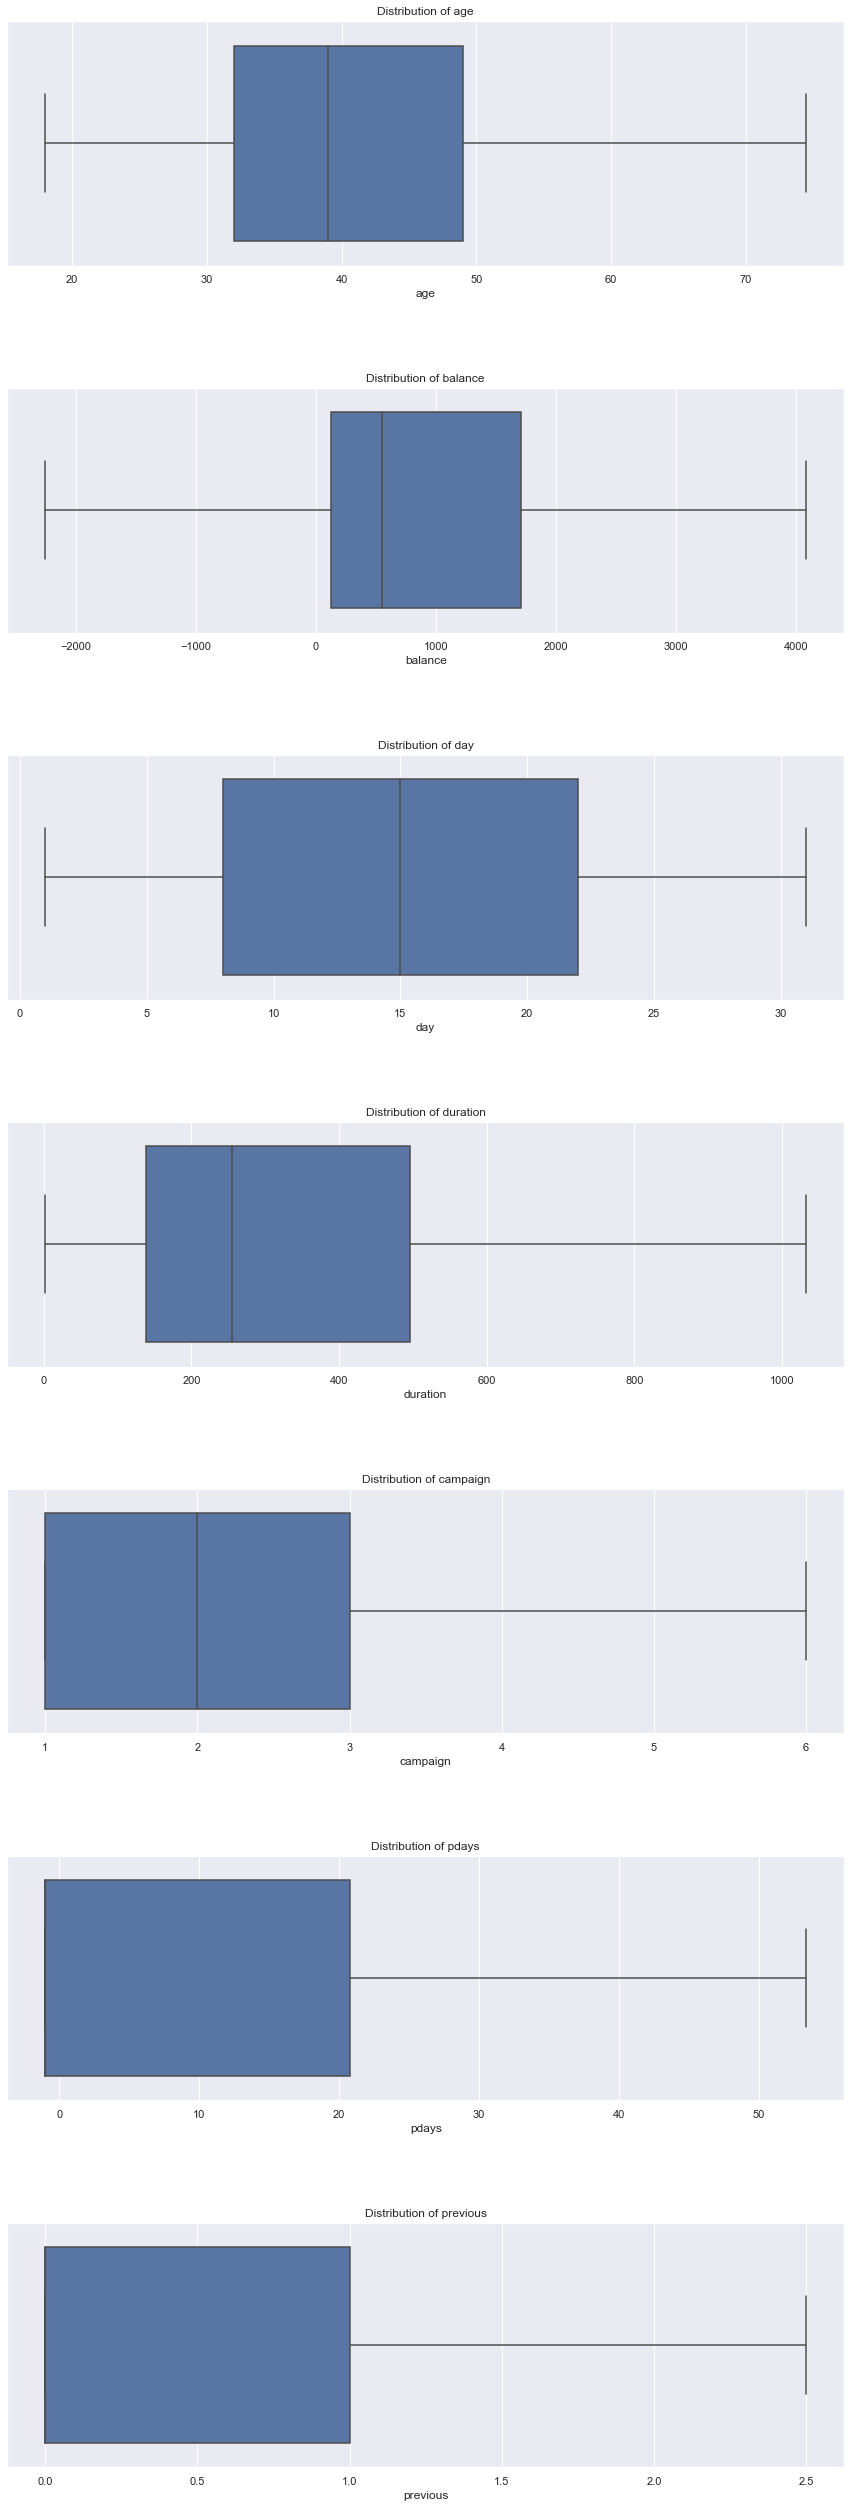

In [28]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(15, 45)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(numerical_col):
    sns.boxplot(x=bank[col], ax=ax[i])
    ax[i].set_title('Distribution of {}'.format(col))

# Split the data into X and Y

In [29]:
x = bank.drop(['deposit'], axis = 1).values
y = bank['deposit'].values

# Standardization & Scaling of Features

In [30]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)
# x = pd.DataFrame(std_scaler.fit_transform(x), columns=encoded_df.drop(['deposit'], axis = 1).columns)

In [31]:
#Split the data into Train-Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Implementing GridSearchCV

In [32]:
param_dict = {
    "criterion": ['gini'],
    "max_depth": [2, 4, 6],
    "min_samples_split":[2, 4, 6],
    "min_samples_leaf": [2, 4, 6]
}

In [33]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dict, cv=10)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 4, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]})

In [34]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [35]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42)

In [36]:
grid.best_score_

0.8142007592686517

# Build the Decision Tree Model

In [37]:
model_dt = DecisionTreeClassifier(random_state=42, max_depth=6, criterion = "gini", min_samples_leaf= 6, min_samples_split= 2)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ", model_dt_score_train * 100)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ", model_dt_score_test * 100)

Training score:  82.36084667935938
Testing score:  80.51948051948052


# Predictions

In [38]:
predictions = model_dt.predict(x_test)
predictions

array([1, 1, 1, ..., 0, 1, 0])

# Performance Metrics

In [39]:
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [40]:
accuracy_score = metrics.accuracy_score(y_test, predictions)
precision_score = metrics.precision_score(y_test, predictions)
recall_score = metrics.recall_score(y_test, predictions)

print("Accuracy:", accuracy_score * 100)
print("Precision:", precision_score * 100)
print("Recall:", recall_score * 100)

Accuracy: 80.51948051948052
Precision: 81.10236220472441
Recall: 77.22586691658857


# Area Under the Curve

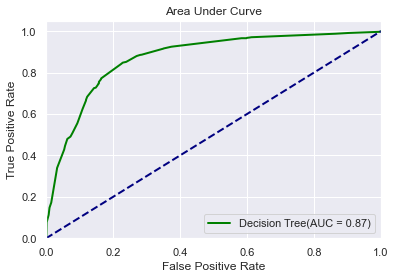

In [41]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [42]:
print (confusion_matrix(y_test, predictions))

[[974 192]
 [243 824]]


In [43]:
import itertools

def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


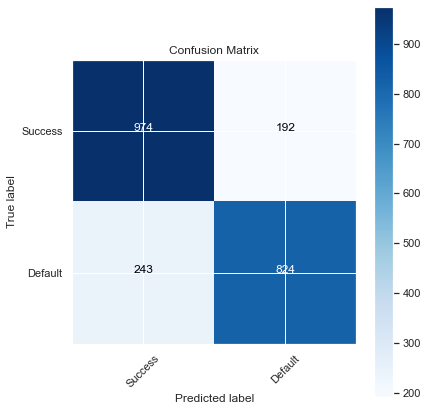

In [44]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Store The Result in csv file

In [45]:
y = pd.DataFrame(x_test)
y['y_test'] = y_test
y['Predictions'] = predictions
y = y.reset_index(drop=True)
y.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,y_test,Predictions
0,2.045500,0.158790,-1.917331,-0.380501,-0.123617,-0.276637,-0.947616,-0.387923,-0.598149,-1.265746,-0.139642,-0.600447,-0.814270,-0.578658,-0.543848,0.520705,0,1
1,-0.270388,-1.081525,-0.318672,-0.380501,-0.123617,0.377625,-0.947616,-0.387923,1.844786,0.040612,0.173661,2.388642,2.472848,-0.578658,-0.543848,0.520705,1,1
2,-0.527709,-1.081525,1.279987,-0.380501,-0.123617,2.200374,1.055280,-0.387923,-0.598149,-0.196908,0.800268,0.361963,-0.814270,1.738589,0.576571,-2.470600,1,1
3,0.501575,-1.081525,-0.318672,-0.380501,-0.123617,2.200374,-0.947616,-0.387923,-0.598149,-0.909466,-1.392855,1.514044,-0.156846,-0.578658,-0.543848,0.520705,1,1
4,-0.527709,1.399105,-0.318672,0.953822,-0.123617,0.263518,1.055280,-0.387923,1.844786,-0.434427,0.800268,-0.944666,0.500577,-0.578658,-0.543848,0.520705,0,0


In [46]:
y.columns=[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'Predictions']]
y.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Predictions
0,2.045500,0.158790,-1.917331,-0.380501,-0.123617,-0.276637,-0.947616,-0.387923,-0.598149,-1.265746,-0.139642,-0.600447,-0.814270,-0.578658,-0.543848,0.520705,0,1
1,-0.270388,-1.081525,-0.318672,-0.380501,-0.123617,0.377625,-0.947616,-0.387923,1.844786,0.040612,0.173661,2.388642,2.472848,-0.578658,-0.543848,0.520705,1,1
2,-0.527709,-1.081525,1.279987,-0.380501,-0.123617,2.200374,1.055280,-0.387923,-0.598149,-0.196908,0.800268,0.361963,-0.814270,1.738589,0.576571,-2.470600,1,1
3,0.501575,-1.081525,-0.318672,-0.380501,-0.123617,2.200374,-0.947616,-0.387923,-0.598149,-0.909466,-1.392855,1.514044,-0.156846,-0.578658,-0.543848,0.520705,1,1
4,-0.527709,1.399105,-0.318672,0.953822,-0.123617,0.263518,1.055280,-0.387923,1.844786,-0.434427,0.800268,-0.944666,0.500577,-0.578658,-0.543848,0.520705,0,0


In [47]:
y.to_csv('classification_prediction_bycap.csv')